# Final - Numerical Project

In [22]:
import math
import scipy.stats as ss 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import seaborn as sns
%matplotlib inline

In [23]:
np.random.seed(1)

In [24]:
# time index for the data with 1/100 discretization
time_index = np.arange(0.01, 1.01, 0.01)

In [34]:
# time incrementing per each value of t
time_increment = time_index[1:] - time_index[:-1]

In [25]:
# standard brownian motion covariance matrix 
bm_cov = np.reshape(np.array([i if i < j else j for j in time_index for i in time_index]), (100,100))

In [26]:
# the standard brownian motion to be implemented 
brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, 
                                                                                      scale=1, 
                                                                                      size=100)) for _ in range(1000)]), 
                                      obj=0, values=0, axis=1)

In [27]:
brownian_increments = np.delete(np.roll(brownian_motion,-1) - brownian_motion, obj=100, axis=1)

In [28]:
brownian_increments

array([[ 0.16243454, -0.06117564, -0.05281718, ...,  0.00435969,
        -0.06200008,  0.0698032 ],
       [-0.04471286,  0.12245077,  0.04034916, ...,  0.04202822,
         0.08109517,  0.10444421],
       [-0.04008782,  0.08240056, -0.05623054, ...,  0.07847707,
        -0.09554253,  0.05859104],
       ...,
       [ 0.25940945, -0.25943018,  0.06037891, ...,  0.02920474,
         0.11120652,  0.08698201],
       [ 0.1102071 ,  0.01847884, -0.10458926, ...,  0.06665994,
        -0.08468813,  0.03151155],
       [-0.04101571, -0.00106451,  0.08254975, ...,  0.00812253,
         0.03440462, -0.07475562]])

## Monte-Carlo Bond Pricing

Consider the following Vasicek model for the interest rate $(R_t, t\geq0)$ under the risk-neutral probability

$$dR_t = (0.01-0.05R_t)dt + 0.1d\tilde{B_t} \ \ \ \ \ \ R_0 =0.1$$

1. Plot 100 paths of the above process on $[0, 1]$ with a 0.01 discretization.
2. Use the risk-neutral pricing formula to find the price $B(0, 1)$ at time $0$ of a bond with maturity $T = 1$ and $B(1, 1) =100$ by averaging over $1000$ paths. to find the price of a European Call with expiration $T_{Call} = 1/2$ and strike price $K = 100$ by averaging over $1000$ paths.

In [46]:
# for calculating the itterative expression
def aFunc(brownian:np.array, time_index: np.array, initial:int, size:int):
    temp = initial
    new_arr = [initial]*(size+1)
    for i in range(size):
        new_arr[i+1] = temp + (0.01 - 0.05 * temp * time_index[i]) + (0.1 * brownian[i])
        temp += (0.01 - 0.05 * temp * time_index[i]) + (0.1 * brownian[i])
    return np.array(new_arr) 

In [47]:
a_plot = np.apply_along_axis(aFunc, 1, np.delete(brownian_increments, 99, 1), time_increment, 0.1, 99)

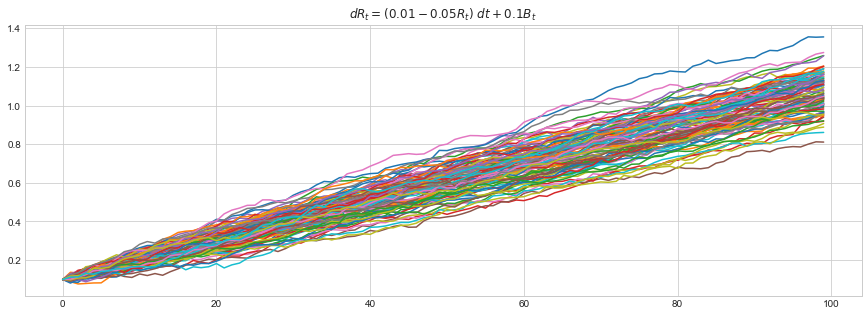

In [51]:
plt.figure(figsize=(15,5))
plt.title("$dR_t = (0.01-0.05R_t) \ dt + 0.1{B_t}$")
for i in a_plot[:100]:
    plt.plot(i)